# Garden Project: Exploratory Data Analysis

---

### <p style="color:#87CEEB"> Getting set up</p>

In [1]:
# Import necessary libraries for analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from eda_funcs import missing_data_overview, get_col_dtypes

In [2]:
# Settings for viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
# Read in csv files
spending_data = pd.read_csv('../garden_data/spending_2020.csv')
planting_data = pd.read_csv('../garden_data/planting_2020.csv')
harvesting_data = pd.read_csv('../garden_data/harvest_2020.csv')

<br>

### <p style="color:#87CEEB"> Preparing and Transforming the data</p>

In [4]:
## Spending dataset changes
# Drop columns
spending_to_drop = ['eggplant_item_number', 'price_with_tax']
spending_df = spending_data.drop(spending_to_drop, axis=1)

# Fill in missing values
spending_df['brand'] = spending_df['brand'].replace(np.nan, 'unknown')

# Rename columns
spending_df = spending_df.rename(columns={'vegetable': 'item_name'})

In [5]:
## Planting dataset changes
# Drop rows
i_tomato = planting_data.loc[planting_data['notes'].notnull()].index
i_strawberry = planting_data.loc[planting_data['date'].isnull()].index

planting_df = planting_data.drop(i_tomato)
planting_df = planting_df.drop(i_strawberry)

# Drop columns
planting_df = planting_df.drop(['notes'], axis=1)

# Rename columns
planting_df = planting_df.rename(columns={'vegetable': 'crop'})

# Change data types
planting_df['number_seeds_planted'] = planting_df['number_seeds_planted'].astype(int)
planting_df['date'] = pd.to_datetime(planting_df['date']).dt.date

In [6]:
## Harvesting dataset changes
# Rename columns
harvesting_df = harvesting_data.rename(columns={'vegetable': 'crop'})

# Change data types
harvesting_df['date'] = pd.to_datetime(harvesting_df['date']).dt.date

<br>

### <p style="color:#87CEEB"> Analyzing data characteristics</p>

## Harvesting Analysis

In [10]:
# Basic statistics for numerical 'weight' column
print(harvesting_df.describe())

            weight
count   781.000000
mean    553.463508
std     825.441737
min       2.000000
25%      94.000000
50%     278.000000
75%     659.000000
max    7350.000000


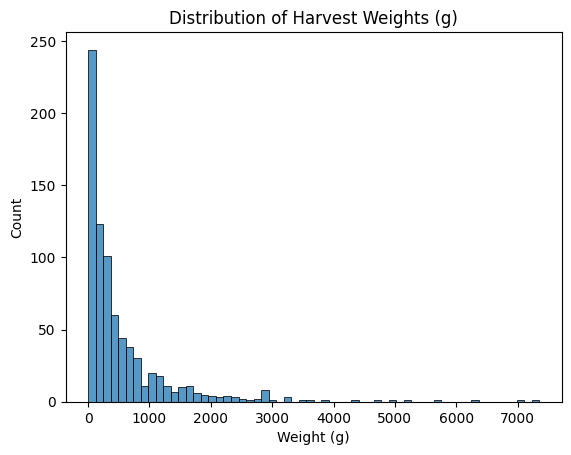

In [11]:
# Histogram of harvest weights
sns.histplot(harvesting_df['weight'])
plt.xlabel('Weight (g)')
plt.ylabel('Count')
plt.title('Distribution of Harvest Weights (g)')

plt.show()

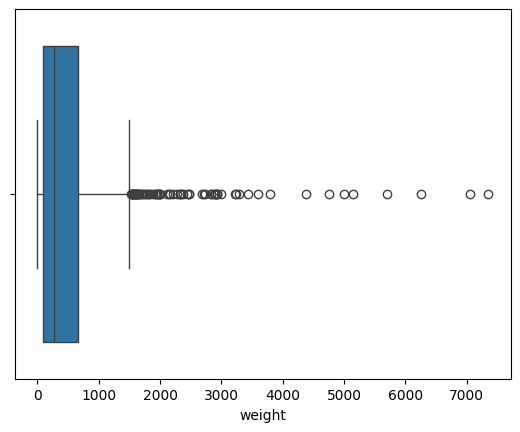

In [14]:
# Boxplot of harvest weights
sns.boxplot(x=harvesting_df['weight'])
plt.show()

In [19]:
# Check harvest weight outliers
outliers_df = harvesting_df[(harvesting_df['weight'] > 1500)]
crop_outliers = outliers_df['crop'].unique()
print(crop_outliers)

['zucchini' 'cucumbers' 'beets' 'corn' 'tomatoes' 'pumpkins' 'squash'
 'edamame' 'potatoes' 'jalapeño' 'rutabaga']


In [14]:
print(harvesting_df.nsmallest(n=5, columns=['weight']))
print('\n')
print(harvesting_df.nlargest(n=5, columns=['weight']))

         crop        variety        date  weight  units
49   cilantro       cilantro  2020-06-23       2  grams
196     basil  Isle of Naxos  2020-07-24       3  grams
50      basil  Isle of Naxos  2020-06-23       5  grams
176     basil  Isle of Naxos  2020-07-21       7  grams
7       beets         leaves  2020-06-11       8  grams


         crop                variety        date  weight  units
555  pumpkins  Cinderella's Carraige  2020-09-01    7350  grams
649  pumpkins                  saved  2020-09-19    7050  grams
643  pumpkins  Cinderella's Carraige  2020-09-19    6250  grams
754  zucchini              Romanesco  2020-10-15    5700  grams
554    squash           Blue (saved)  2020-09-01    5150  grams


crop       variety              
zucchini   Romanesco                45227
pumpkins   saved                    34896
tomatoes   Amish Paste              29789
           volunteers               23411
pumpkins   New England Sugar        20348
cucumbers  pickling                 19781
squash     Blue (saved)             18835
tomatoes   Better Boy               15426
pumpkins   Cinderella's Carraige    14911
tomatoes   grape                    14694
Name: weight, dtype: int64


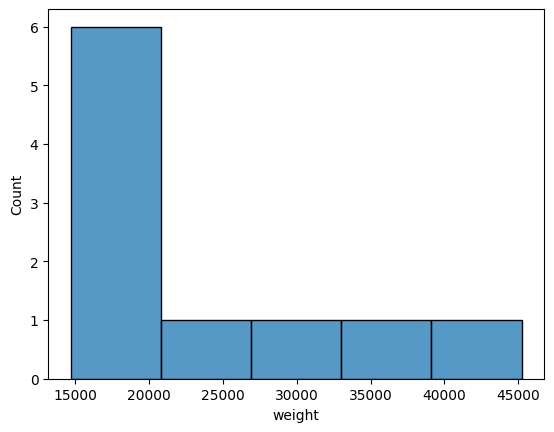

In [34]:
grouped_harvests = harvesting_df.groupby(['crop', 'variety'])
summed_harvests = grouped_harvests['weight'].sum()
sorted_harvests = summed_harvests.sort_values(ascending=False)[:10]

print(sorted_harvests)

sns.histplot(sorted_harvests)
plt.show()

<br>
<br>

# Rough Draft Work

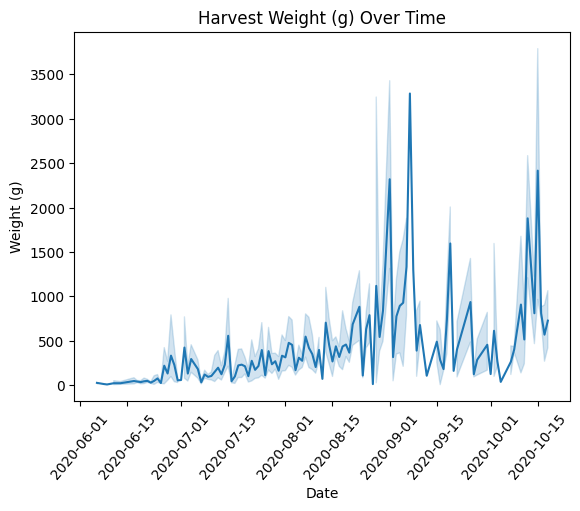

In [22]:
# Plotting harvest weights over time
sns.lineplot(data=harvesting_df, x="date", y="weight")
plt.xlabel('Date')
plt.ylabel('Weight (g)')
plt.title('Harvest Weight (g) Over Time')
plt.xticks(rotation=50)

plt.show()

In [7]:
# Spending dataset

# Numerical columns
print(spending_df.describe())

# Categorical columns


           price
count  65.000000
mean    4.516925
std    11.073482
min     0.000000
25%     1.544998
50%     2.990000
75%     3.250000
max    78.000000


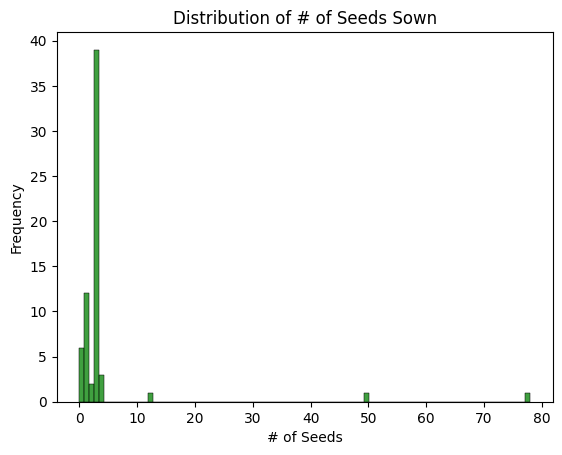

In [22]:
sns.histplot(spending_df['price'], color='green', edgecolor='black')
plt.xlabel('# of Seeds')
plt.ylabel('Frequency')
plt.title('Distribution of # of Seeds Sown')

# Display plot
plt.show()

In [23]:
# Check outliers
print(spending_df[spending_df['price'] > 45])
print('\n')
print(spending_df[spending_df['price'] == 0])

              item_name variety brand  price
41     enriched topsoil     1yd  Kern   50.0
42  raised garden blend     1yd  Kern   78.0


      item_name  variety     brand  price
58      peppers    green     Naomi    0.0
59      peppers  variety     Naomi    0.0
60  hot peppers  variety  Adrienne    0.0
62     potatoes   purple      mine    0.0
63     potatoes   yellow  leftover    0.0
64     potatoes      red  leftover    0.0


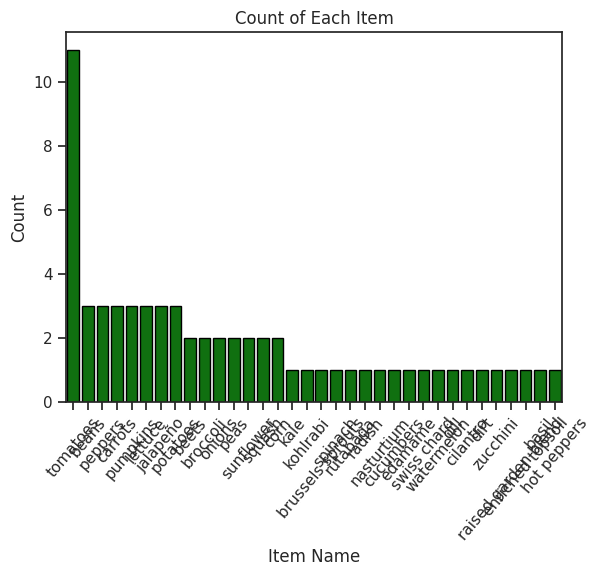

In [41]:
sns.countplot(data=spending_df, x='item_name', color='green', edgecolor='black', order=spending_df['item_name'].value_counts().index)
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Count of Each Item')
plt.xticks(rotation=50)

plt.show()

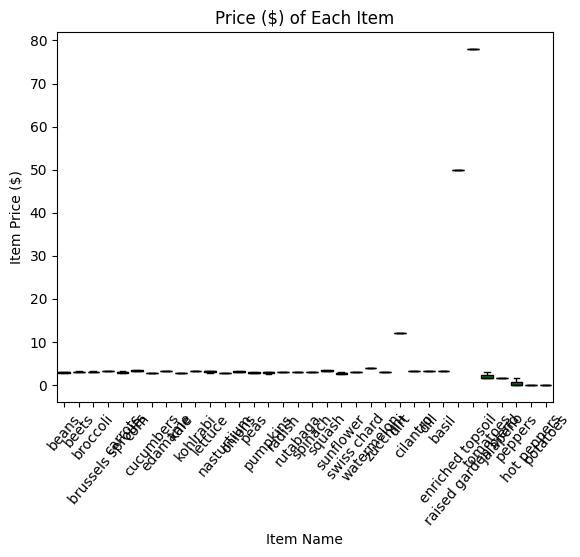

In [7]:
sns.boxplot(data = spending_df, x='item_name', y='price', color='green', linecolor='black')
plt.xlabel('Item Name')
plt.ylabel('Item Price ($)')
plt.title('Price ($) of Each Item')
plt.xticks(rotation=50)

# Display plot
plt.show()



In [ ]:
counts = df["Category"].value_counts().sort_index()
colors = plt.cm.tab10(np.arange(len(counts)))
ax = counts.plot.bar(color=colors)

## Notes:
- ignore records related to dirt
- don't use free plants when determining value of each plant by harvest weight and packet price

In [13]:
print(planting_df.describe())

       number_seeds_planted
count             91.000000
mean              18.483516
std               26.732154
min                1.000000
25%                3.000000
50%                8.000000
75%               25.000000
max              200.000000


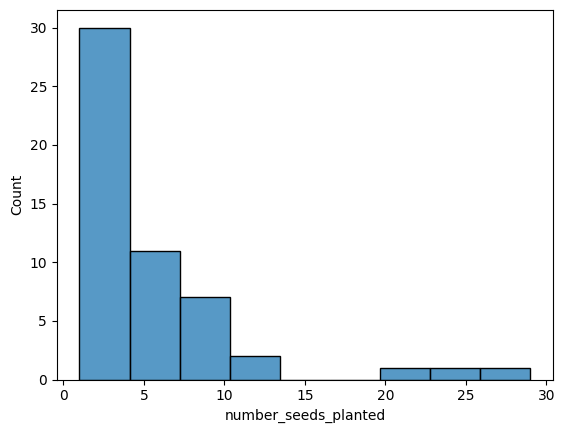

In [51]:
planting_exact_seeds = planting_df[planting_df['number_seeds_exact'] == True]
exact_num_seeds_df = planting_exact_seeds['number_seeds_planted']

sns.histplot(exact_num_seeds_df)
plt.show()

In [54]:
planting_exact_seeds_num = planting_df[(planting_df['number_seeds_planted'] < 30) & (planting_df['number_seeds_exact'] == True)]
crops_exact_seeds_num_df = planting_exact_seeds_num['crop']
print(crops_exact_seeds_num_df.unique())

['peas' 'squash' 'pumpkins' 'tomatoes' 'peppers' 'hot peppers' 'beans'
 'zucchini' 'brussels sprouts' 'jalapeño' 'broccoli' 'potatoes'
 'watermelon' 'melon']


In [49]:
# Check outliers
print(planting_df[(planting_df['number_seeds_planted'] > 10) & (planting_df['number_seeds_exact'] == True)])

   plot              crop              variety  number_seeds_planted        date number_seeds_exact
0     A              peas     Super Sugar Snap                    22  2020-04-19               True
1     B              peas     Magnolia Blossom                    24  2020-04-19               True
47    K           peppers                green                    12  2020-05-21               True
59    D  brussels sprouts          Long Island                    13  2020-05-21               True
89    E             beans  Classic Slenderette                    29  2020-06-20               True
